In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import *
from mtcnn.mtcnn import MTCNN
from pandas import *
from datetime import date
from collections import namedtuple
import cv2
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *
from sklearn.metrics import confusion_matrix
from joblib import dump, load
import pickle
import os
from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *
from skimage.filters import threshold_local
from keras.applications import *
from keras.callbacks import *
from tensorflow.keras import *
from tensorflow.keras.layers import *
from keras.applications.resnet50 import ResNet50
from keras_vggface.vggface import VGGFace
from keras.applications.inception_resnet_v2 import InceptionResNetV2
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[1],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8000)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
        print(e)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2 Physical GPUs, 2 Logical GPUs
Num GPUs Available:  2


In [94]:
homePath = "data/"

In [95]:
chars = ["bb_tran",
"bich_phuong",
"bui_anh_tuan",
"chi_dan",
"chi_pu",
"dam_vinh_hung",
"den_vau",
"duc_phuc",
"erik",
"ha_anh_tuan",
"hien_ho",
"ho_quang_hieu",
"huong_giang",
"huynh_phuong",
"karik",
"ngoc_trinh",
"toc_tien",
"tran_thanh",
"truong_giang",
"vinh_rau",
]

In [96]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
#     it = 0
    for i,char in enumerate(chars):
        imgPath = homePath + char + "/"
#         print(imgPath)
        imgFiles = os.listdir(imgPath)
#         print("len = ", len(imgFiles))
        for image in imgFiles:
            try:
                
                img = cv2.imread(imgPath + image,1)
                img = cv2.resize(img, (224, 224))
            except:
                print(image)
                continue
                
            img = np.expand_dims(img, 0)
            data.append(img)
            idd = [i]
            label.append(idd)
    
    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [97]:
data,label = preprocessdata(homePath)

In [98]:
x = data
y = label
x = np.vstack(x)
print(x.shape)

(1413, 224, 224, 3)


In [100]:
with tf.device('/device:GPU:1'):
    baseModel = VGGFace(weights='vggface', include_top=False)
    baseModel = VGGFace(model = 'resnet50', weights = 'vggface', include_top=False)
    x = baseModel.predict(x)
    print(x.shape)
    x = x.reshape((x.shape[0], 2048*1*1))

104947712/104944616 [==============================] - 9s 0us/step
(1413, 1, 1, 2048)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)
y_tt = y_test

In [102]:
print(X_train.shape)

(282, 2048)


In [103]:
params = {'C' : [0.1, 1.0, 10.0, 100.0]}
#model = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='multinomial'), params)
model = GridSearchCV(LogisticRegression(), params)
model.fit(X_train, y_train)
print('Best parameter for the model {}'.format(model.best_params_))

/storage/giangdl/anaconda3/envs/prj_envs/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/storage/giangdl/anaconda3/envs/prj_envs/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/storage/giangdl/anaconda3/envs/prj_envs/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d ar

/storage/giangdl/anaconda3/envs/prj_envs/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/storage/giangdl/anaconda3/envs/prj_envs/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/storage/giangdl/anaconda3/envs/prj_envs/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/storage/giangdl/anaconda3/envs/prj_envs/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d arr

Best parameter for the model {'C': 1.0}


/storage/giangdl/anaconda3/envs/prj_envs/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
# for layer in baseModel.layers:
#     layer.trainable = True
    
# opt = RMSprop(0.001)
# model.compile(opt, 'categorical_crossentropy', ['accuracy'])
# numOfEpoch = 25
# H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=32), 
#                         steps_per_epoch=len(X_train)//32,
#                         validation_data=(aug_test.flow(X_test, y_test, batch_size=32)),
#                         validation_steps=len(X_test)//32,
#                         epochs=numOfEpoch)

In [105]:
y_tt = model.predict(X_test)
print(classification_report(y_test, y_tt, target_names = chars))

               precision    recall  f1-score   support

      bb_tran       0.94      0.87      0.90        69
  bich_phuong       0.94      0.96      0.95        53
 bui_anh_tuan       1.00      0.98      0.99        52
      chi_dan       0.88      0.95      0.91        62
       chi_pu       1.00      0.95      0.97        73
dam_vinh_hung       0.98      1.00      0.99        61
      den_vau       0.98      0.97      0.98        63
     duc_phuc       0.87      0.93      0.90        58
         erik       0.88      0.88      0.88        33
  ha_anh_tuan       0.91      1.00      0.95        51
      hien_ho       0.97      0.97      0.97        59
ho_quang_hieu       0.92      0.95      0.93        60
  huong_giang       0.91      0.96      0.93        51
 huynh_phuong       0.98      0.87      0.92        46
        karik       0.89      0.98      0.93        41
   ngoc_trinh       0.96      0.88      0.92        57
     toc_tien       0.95      0.95      0.95        59
   tran_t

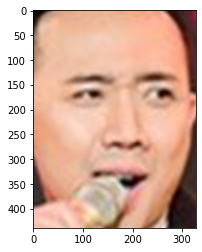

names =  tran_thanh


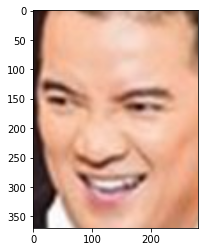

names =  dam_vinh_hung


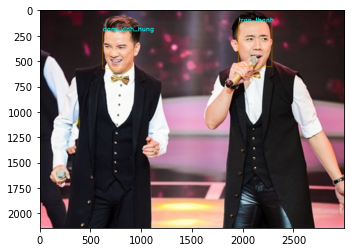

In [110]:
with tf.device('/device:GPU:1'):
    detector = MTCNN()
    path = "dv1.jpg"
    image_ = cv2.imread(path)
    
    xx = image_.shape[0]
    yy = image_.shape[1]
    image = cv2.resize(image_, (yy * 3, xx * 3))
    temp_image = cv2.resize(image_, (yy * 3, xx * 3))
    result = detector.detect_faces(image)
    for person in result:
        bounding_box = person['box']
        keypoints = person['keypoints']

        cv2.rectangle(image,
                      (bounding_box[0], bounding_box[1]),
                      (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                      (0,155,255),
                      2)
        
        img = temp_image[bounding_box[1]:bounding_box[1] + bounding_box[3], bounding_box[0]:bounding_box[0] + bounding_box[2]]
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.show()
        img = cv2.resize(img, (224, 224))
        img = np.expand_dims(img, 0)
        img = baseModel.predict(img)
        img = img.reshape((img.shape[0], 2048*1*1))
        
        test_logits = model.predict(img)
       
        res__ = chars[int(test_logits)]
        print("names = ", res__)
        cv2.putText(image, str(res__), (bounding_box[0], bounding_box[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (255, 255, 0), 3)
    
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.show()

    # cap = cv2.VideoCapture(0)
    # while True: 
    #     #Capture frame-by-frame
    #     __, frame = cap.read()

    #     #Use MTCNN to detect faces
    #     result = detector.detect_faces(frame)
    #     if result != []:
    #         for person in result:
    #             bounding_box = person['box']
    #             keypoints = person['keypoints']

    #             cv2.rectangle(frame,
    #                           (bounding_box[0], bounding_box[1]),
    #                           (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
    #                           (0,155,255),
    #                           2)

    #             # cv2.circle(frame,(keypoints['left_eye']), 2, (0,155,255), 2)
    #             # cv2.circle(frame,(keypoints['right_eye']), 2, (0,155,255), 2)
    #             # cv2.circle(frame,(keypoints['nose']), 2, (0,155,255), 2)
    #             # cv2.circle(frame,(keypoints['mouth_left']), 2, (0,155,255), 2)
    #             # cv2.circle(frame,(keypoints['mouth_right']), 2, (0,155,255), 2)
    #     #display resulting frame
    #     cv2.imshow('frame',frame)
    #     if cv2.waitKey(1) &0xFF == ord('q'):
    #         break
    # #When everything's done, release capture
    # cap.release()
    # cv2.destroyAllWindows()

In [111]:
dump(model, 'fre_.joblib') 

['fre_.joblib']

In [ ]:
# with tf.device('/device:GPU:1'):

#     detector = MTCNN()

#     chars = ["bb_tran",
#     "bich_phuong",
#     "bui_anh_tuan",
#     "chi_dan",
#     "chi_pu",
#     "dam_vinh_hung",
#     "den_vau",
#     "duc_phuc",
#     "erik",
#     "ha_anh_tuan",
#     "hien_ho",
#     "ho_quang_hieu",
#     "huong_giang",
#     "huynh_phuong",
#     "karik",
#     "ngoc_trinh",
#     "toc_tien",
#     "tran_thanh",
#     "truong_giang",
#     "vinh_rau"
#     ]
#     # anh
#     # image = cv2.imread("anhtestthuong.jpg")
#     # result = detector.detect_faces(image)

#     # for person in result:
#     #     bounding_box = person['box']
#     #     keypoints = person['keypoints']

#     #     cv2.rectangle(image,
#     #                   (bounding_box[0], bounding_box[1]),
#     #                   (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
#     #                   (0,155,255),
#     #                   2)
#     #     print(bounding_box[0])
#     #     print("duonglegiang")

#     # cv2.imshow("image",image)
#     # cv2.waitKey(0)
#     # video

#     model = load('fre_.joblib') 
#     baseModel = VGGFace(weights='vggface', include_top=False)
#     cap = cv2.VideoCapture("ka4.mp4")
#     fourcc = cv2.VideoWriter_fourcc(*'XVID')
#     out = cv2.VideoWriter('kaout.mp4',fourcc, 25.0, (640,480))

#     while(cap.isOpened()): 
#         #Capture frame-by-frame
#         __, frame = cap.read()

#         #Use MTCNN to detect faces
#         result = detector.detect_faces(frame)
#         if result != []:
#             for person in result:
#                 bounding_box = person['box']
#                 keypoints = person['keypoints']

#                 cv2.rectangle(frame,
#                               (bounding_box[0], bounding_box[1]),
#                               (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
#                               (0,155,255),
#                               2)

#                 img = frame[bounding_box[1]:bounding_box[1] + bounding_box[3], bounding_box[0]:bounding_box[0] + bounding_box[2]]
#                 # plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#                 # plt.show()
#                 try:
#                     img = cv2.resize(img, (224, 224))
#                 except:
#                     continue

#                 img = np.expand_dims(img, 0)
#                 img = baseModel.predict(img)
#                 img = img.reshape((img.shape[0], 512*7*7))

#                 test_logits = model.predict(img)

#                 res__ = chars[int(test_logits)]
#                 print("names = ", res__)
#                 cv2.putText(frame, str(res__), (bounding_box[0], bounding_box[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 0), 3)

#         # cv2.imshow('frame',frame)
#         out.write(frame)

#         if cv2.waitKey(1) &0xFF == ord('q'):
#             break

#     cap.release()
#     out.release()

#     cv2.destroyAllWindows()

In [ ]:
len(chars)